# Apprentissage non supervisé et MDS



**Objectif de l'exposé**:
- Rappel des problèmes d'apprentissage non supervisé,
- Introduction d'une méthode de **réduction de dimension** appelée **Positionnemment multi-dimensionnel** (MDS),
- Introduction du problème nonlinéaire.

**Différents problèmes d'apprentissage non supervisé**:
- **Clustering**: on représente les données en plusieurs paquets/groupes. Exemple de méthodes: K-moyenne (Joubine), Mélange Gaussien (Laurent),
- **Réduction de dimension**: on représente des données de grandes dimensions par des données en petite dimension. Exemple de méthodes: PCA (Clémentine),
- **Apprentissage de dictionnaire parcimonieux** on représente des données de grandes dimensions par des données potentiellement en grande dimension mais creuse. Exemple de méthodes: l'année prochaine,
- **Estimation de densité**: On construit une loi de probabilité à partir d'un échantillon. Exemple de méthodes: Mélange Gaussien (Laurent)

## Modèles génératifs et apprentissage non supervisé.

Une voie pour unifier ces problèmes:
- Un modèle génératif est une loi de probabilité paramétrique : $p_{\theta}(x)$. 
- L'apprentissage d'un modèle paramètrique consiste à ajuster $\theta$ pour que le modèlen soit capable de générer au mieux l'échantillon ($x_1$,...,$x_n$). On passe souvent par le **maximum de vraissemblance**.

**Remarque**: On peut écrire les quatres problèmes précédent comme un modèle génératif.

**Modèles génératifs à variable latente** (sous classe de modèle génératif):
- on se donne ou on construit $p_{\theta_p}(z)$ la **distribution à priori** (des variables latentes)
- on construit le **modèle à posteriori**:
$$
p_{\theta}(x \mid z), \quad x\in \mathbb{R}^d
$$

Le clustering, la réduction de dimension et l'apprentissage de dictionnaire parcimonieux peuvent s'écrire comme des **modèles génératifs à variable latente**.

**Clustering**:
- La variable latente est le numéro du groupe.
- $z \in \left\{1,....,K\right\}$ et $p(z=k)=\mathcal{C}(K)$ (loi de probabilité catégorielle à $K$ valeur de probabilité $p_1$,..$p_K$).
- Loi à posteriori:

$$
p_{\theta}(x\mid z)=\mathcal{N}(0,c_k,\Sigma_k)
$$

avec $\theta=(c_1,....c_K,\Sigma_1,....,\Sigma_K)$. Pour la méthode des K-moyenne, les $\Sigma_k=I_d$. Pas le cas dans les mélanges Gaussien.

**Réduction de dimension**:
- $z \in \mathbb{R}^m$ avec $m<<d$ et $p(z)=\mathcal{N}(0,\Sigma_z)$.
- Loi à posteriori:

$$
p_{\theta}(x\mid z)=\mathcal{N}((\omega,z) + b,\sigma^2 I_d)
$$

avec $\theta_p=\Sigma_z$ et $\theta=(\omega,b)$. La PCA par exemple permet de déterminer ces paramètres.

**Dictionnaire Parcimonieux**:
- $z \in \mathbb{R}^m$ avec $m\approx d$ et $p(z)=\mathcal{L_a}(0,\Sigma_z)$ (loi de Laplace).
- Loi à posteriori:

$$
p_{\theta}(x\mid z)=\mathcal{N}((\omega,z) + b,\sigma^2 I_d)
$$

avec $\theta_p=\Sigma_z$ et $\theta=(\omega,b)$.

Exposé de l'année prochaine pour les détails

**Conclusion** : Ces trois problèmes d'apprentissage supervisé consiste à rechercher des variables latentes (cachées ?) expliquant les données. Ces variables peuvent être **discrètes** (clustering), **continues** (réduction de dimension), **parcimonieuses** (dictionnaire).

## Positionnement multi-dimensionnel

Dans la suite et pendant les 3 prochains exposés on va parler de **réduction de dimension**.

Ici: **MDS** méthode généralisant l'**ACP**.

On a donc $(x_1,....x_n)$ un échantillon de vecteur $\mathbb{R}^d$. On suppose que les données peuvent bien approchées par un hyperplan de dimension $m$ avec $m<<d$.

**Idée**:

- On souhaite que des éléments similaires en grande dimension reste similaire en petite dimension.
- On se donne une distance $d(.,.)$ qui modélise cette similarité.
- On trouve répresentation en petite dimension qui **préserve les distances/les voisinages**. Cela revient à trouver $\mathcal{Z}=(z_1,...z_n)\in \mathbb{R}^m$ tel que 

$$
d_{2}(z_i,z_j) \approx d(\hat{x}_i,\hat{x}_j) \quad \forall\quad 1<i,j<n
$$

avec $\hat{x}$ les données centrées du jeux d'échantillon.

Cela va passer par beaucoup d'algèbre linéaire:

- Soit une matrice $D^a \in \mathcal{M}_{n,n}(\mathbb{R})$. On dit qu'elle est une **matrice de distance Euclidienne** si il existe $d>0$ et $\mathcal{X}=(x_1,...,x_n)\in \mathbb{R}^d$ tel que

$$
D^a_{ij}=d_2(x_i-a,x_j-a)
$$

- Soit une matrice $S^a \in \mathcal{M}_{n,n}(\mathbb{R})$. On dit qu'elle est une **matrice de distance carré Euclidienne** si il existe $d>0$ et $\mathcal{X}=(x_1,...,x_n)\in \mathbb{R}^d$ tel que

 $$
S^a_{ij}=d_2(x_i-a,x_j-a)^2
$$

- Soit l'ensemble $\mathcal{X}=(x_1,...,x_n)\in \mathbb{R}^d$, on appelle la **matrice de Gram** associée, la matrice $G^a\in \mathcal{M}_{n,n}(\mathbb{R})$ tel que:

$$
G^a_{ij}= <x_i-a,x_j-a>
$$


**Point clé**:
- On se donne **une matrice similarité** D associée à une distance $d$
- Problème d'origine

$$
\operatorname{min}_{z_1,...,z_n}J(z_1,...z_n)=\operatorname{min}\sum_{i,j}\parallel D_{ij}^0- d_2(z_i,z_j) \parallel_2^2
$$

- Pas de solution en général.
- On veut le remplacer par:

$$
\operatorname{min}_{z_1,...,z_n}J(z_1,...z_n)=\operatorname{min}\sum_{i,j}\parallel G^{\bar{x}}_{ij}- <z_i,z_j> \parallel_2^2
$$

avec $G_{ij}=<x_i-\bar{x},x_j-\bar{x}>$

**Suite**: comment changer de problème et pourquoi ?

**Pourquoi ?**: Le problème va avoir une solution en générale car:

- Les matrices de Gram sont définies positives,
- Soit $rang(G)=r$, il existe une décomposition

$$
G^{\bar{x}}=X^t X
$$

avec $X=[x_1,...,x_n] \in \mathcal{M}_{d,n}(\mathbb{R})$ et $x\in \mathbb{R}^d$ avec

$$
D_{ij}=d_2(x_i,x_j)
$$

On peut appliquer une SVD à $X$ qui donne

$$
X= V \Sigma_d U^t, \quad \mbox{ donc } G=U \Sigma_d^2 U^t 
$$

avec $\Sigma_d \in \mathcal{M}_{d,d}(\mathbb{R})$ diagonale (rangé par ordre décroissant), $U\in \mathcal{M}_{n,d}(\mathbb{R})$ et $V\in \mathcal{M}_{d,d}(\mathbb{R})$. 

Pour construire les variables réduites on utilise

$$
Z= V_{m}^{t}X = \Sigma_d U_{m}^t
$$

avec $m<<d$. Cela revient à garder **les termes associés aux $m$ plus grandes valeurs propres**.


**Comment ?**
- On à notre disposition $D^0$.
- On calcule facilement $S^0$.
- Matrice de distance carré centrée:

$$
S^{\bar{x}} = \left(I_d -\frac{1}{n}E\right)S^0 \left(I_d -\frac{1}{n}E\right)
$$

avec $E$ la matrice des 1.
- Matrice de Gram (dans le cas $d=d_2(.,.))$:
$$
G^{\bar{x}}=-\frac12 S^{\bar{x}}
$$  

**A La fin**:
- On passe d'une matrice des distances à une **matrice de Gram centrée réduite**.
- On diagonalise la matrice de Gram et on utilise une version tronquée de la représentation des variables.

**MDS Vs PCA**
- Si $D$ est issue de la distance **euclidienne** PCA et MDS sont très proches: En PCA on diagonalise $X X^t\in\mathcal{M}_{d,d}(\mathbb{R})$. En MDS on diagonalise $G=X^t X\in\mathcal{M}_{n,n}(\mathbb{R})$. Dans les deux cas on utilise une SVD sur $X$ **les données centrées**.
- MDS plus général que l'ACP car on peut **changer de distance**.

**Distance générale**
- si $d$ n'est pas la distance euclidienne, $G$ est symétrique, pas forcement positive.

- On verra un exemple dans mon prochain exposé (suspence :)).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets, decomposition
from sklearn import utils

In [2]:
def make_hyperplan(n_samples=100, *, noise=0.0, random_state=None):

    generator = utils.check_random_state(random_state)   
    x = 3 * (generator.rand(1, n_samples) - 0.5)
    y = 2.0 * (generator.rand(1, n_samples) +2.0)
    z = 2.0 * np.ones((1,n_samples)) +1.0
    X = np.concatenate((x, y, z))
    X += noise * generator.randn(3, n_samples)
    X = X.T
    t = np.squeeze(x)
    return X, t

In [15]:
n_points = 500
n_neighbors = 10
n_components = 2

# Create figure
def plot_linear(n_points,n_components):
    
    X, color = make_hyperplan(n_points, noise=0.05)
    fig = plt.figure(figsize=(15, 4))
    ax = fig.add_subplot(131, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(16, -92)
    ax.set_zlim(2.5,3.5)

    pca = decomposition.TruncatedSVD(n_components=2)
    Y_pca= pca.fit_transform(X)
    ax1 = fig.add_subplot(1, 3,2)
    ax1.scatter(Y_pca[:, 0], Y_pca[:, 1], c=color, cmap=plt.cm.Spectral)

    embedding_mds = manifold.MDS(n_components=2,n_init=1)
    Y_mds = embedding_mds.fit_transform(X)
    ax2 = fig.add_subplot(1, 3,3)
    ax2.scatter(Y_mds[:, 0], Y_mds[:, 1], c=color, cmap=plt.cm.Spectral)

**Exemple**:
    
Le plan en 3D, la projection 2D PCA et la projection 2D MDS.

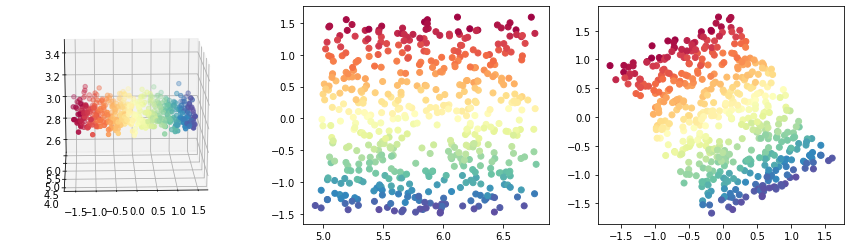

In [16]:
plot_linear(n_points,n_components)

## Apprentissage de Variété

Jusqu'à présent: on a supposé que les observations sont distribuées sur un **hyperplan de dimension basse**.

**Cas plus général**: observations distribuées selon une **variété différentielle**. Est ce que ca marche ?

**Objectif**: préserver les voisinages des données sur la variété en dimension basse. 

<img src="principe_manifold.jpg" alt="Drawing" style="width: 300px;"/>

In [9]:
n_points2 = 500
n_points3 =2000

n_components = 2

def plot_nonlinear(n_points,n_components):
    X, color = datasets.make_swiss_roll(n_points, noise=0.05)

    # Create figure
    fig = plt.figure(figsize=(15, 4))
    ax = fig.add_subplot(131, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(16, -92)

    pca = decomposition.TruncatedSVD(n_components=2)
    Y_pca= pca.fit_transform(X)
    ax1 = fig.add_subplot(1, 3,2)
    ax1.scatter(Y_pca[:, 0], Y_pca[:, 1], c=color, cmap=plt.cm.Spectral)

    embedding_mds = manifold.MDS(n_components=2,n_init=1)
    Y_mds = embedding_mds.fit_transform(X)
    ax2 = fig.add_subplot(1, 3,3)
    ax2.scatter(Y_mds[:, 0], Y_mds[:, 1], c=color, cmap=plt.cm.Spectral)

**Exemple**:
    
La variété en 3D, la projection 2D PCA et la projection 2D MDS.

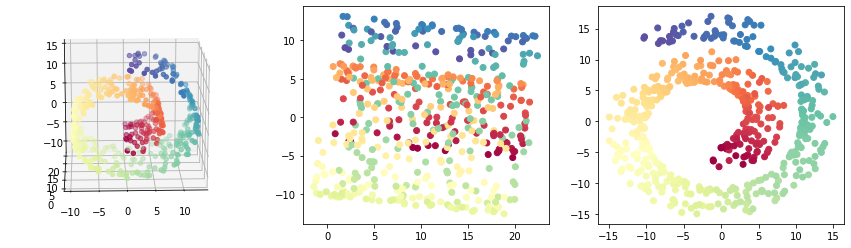

In [10]:
plot_nonlinear(n_points2,n_components)

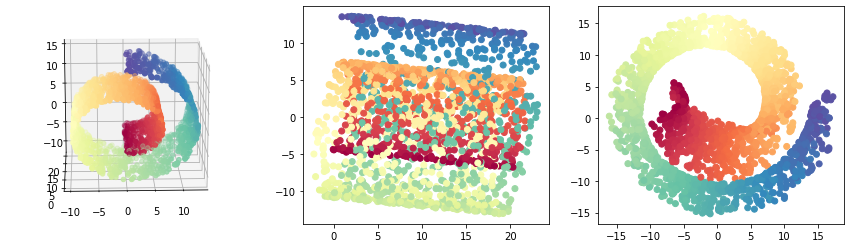

In [11]:
plot_nonlinear(n_points3,n_components)

## Conclusion

La méthode MDS généralise la PCA en travaillant pas sur les données mais sur les distances. Pas suffisant pour traiter le cas des variétés différentielles.

Les variétés sujet des 3 prochains exposés.